# Microstructural Status of the Corpus Callosum is Associated with Bimanual Motor Performance in Chronic Stroke Survivors

## *Rini Varghese, Brianna Chang, Bokkyu Kim, Sook-Lei Liew, Nicolas Schweighofer, and Carolee J Winstein*
### Division of Biokinesiology & Physical Therapy, University of Southern California, Los Angeles, CA

***Transcallosal diaschisis*** is a form of transhemispheric diaschisis in which the ischemic event in the lesioned cortex triggers structural and functional alterations in its contralateral homolog through the corpus callosum. Although the exact mechanism of transhemispheric diaschisis in humans is not well understood, evidence from animal model suggests reorganization in the intact cortex to be an important process (see theoretical model below from [Jones & Adkins, 2015, Physiology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4556825/). 
Reinnervation accomplished during this time through the sprouting of collaterals from existing axons rather than the genesis of new long-distance neurons, and so is most likely to alter the microstructure and connectivity of local axon pools within a given region. Here, we examine the microstructural status of callosal white matter in chronic stroke survivors and its association with bimanual task performance.

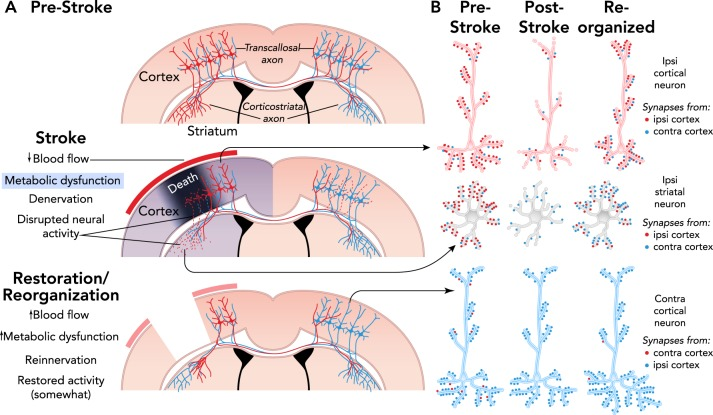


## Purpose & Hypothesis
1) To examine the relationship between performance on a real-world bimanual task and FA of the CC in chronic stroke survivors. We hypothesized that lower FA in both the sensorimotor and non-sensorimotor regions would correspond with poorer performance on the bimanual task. 

2) To examine FA reductions in chronic stroke survivors by comparing the microstructural status of the CC to that of age-similar controls. We hypothesize that compared to controls, FA will be significantly reduced in all regions of the CC, including the non-sensorimotor regions. 


In [94]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

# Load Packages

In [95]:
version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            

In [2]:
rm(list=ls())

ReqdLibs = c("repr","ggplot2","IRdisplay","psych","GGally","ggpubr","gghalves","patchwork","lmerTest","rstatix","car","sjPlot","ggeffects",
             "huxtable","boot","broom","ggExtra","emmeans","dplyr","tidyr","boot","stargazer","table1","lmtest","purrr","visreg","grid","robustlmm")

# ReqdLibs = c("ggplot2")
# install.packages(ReqdLibs)
suppressMessages(invisible(lapply(ReqdLibs, library, character.only = TRUE)))

setFigThm = theme_pubclean() + 
            theme(text = element_text(colour = "black",size=20), 
                  plot.title = element_text(colour = "black",size = 25),
                  axis.ticks.length = unit(0.35,"cm"),
                  axis.line = element_line(colour = "black",size=0.75),
                  axis.ticks = element_line(colour = "black",size=0.75),
                  axis.text = element_text(colour = "black",size=20),
                  strip.text.x = element_text(size = 20),
                  legend.text=element_text(size=20),
                  legend.position="top") 


display_html('Necessary packages have been loaded. Figure theme is set.')

Warning message:
“namespace ‘DBI’ is not available and has been replaced
by .GlobalEnv when processing object ‘<unknown>’”
Warning message:
“namespace ‘DBI’ is not available and has been replaced
by .GlobalEnv when processing object ‘<unknown>’”


Necessary packages have been loaded. Figure theme is set.

*** 
# Table 1: Demographics

In [97]:
demo = read.csv("0_demo_only.csv")
head(demo,3)
tail(demo,3)


,subjID,grp,batch,sex,age,sol,chron,lesionVol,uefm
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>
1,gync_3001,younger,upc,male,34,,NA,NA,NA
2,gync_3002,younger,upc,female,20,,NA,NA,NA
3,gync_3003,younger,upc,female,29,,NA,NA,NA


,subjID,grp,batch,sex,age,sol,chron,lesionVol,uefm
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>
91,dose_2039,stroke,hsc,male,69,RHD,0.6630137,4.524,19
92,dose_2040,stroke,hsc,male,72,RHD,4.0575342,3.425,37
93,dose_2041,stroke,hsc,female,55,LHD,0.5369863,26.205,42


In [98]:
demo$grp <- factor(demo$grp, levels=c('younger','older','stroke'),labels = c("Younger","Older","STROKE"))
demo$sex <- factor(demo$sex, levels=c('female','male'),labels=c("Female", "Male"))

demoSub1 = demo[demo$grp!="Younger",]
demoSub2 = demo[demo$grp=="Stroke",]

strata <- c(split(demo, demo$grp)) #,split(demoSub2,demoSub2$sol)

rndr <- function(x, name, ...) {
    if (!is.numeric(x)) return(render.categorical.default(x,render.missing=c("-")))
    what <- switch(name,
        uefm = "Median [Min, Max]",
        age  = "Mean (SD)",
        chron = "Median [Min, Max]",
        lesionVol = "Median [Min, Max]")
    parse.abbrev.render.code(c("", what))(x)
}

                 
labels <- list(variables=list(age="Age (years)", sex="Sex", chron="Chronicity (years)",
                              uefm="UE Fugl-Meyer (/66)",lesionVol="Lesion Volume (cc)"),
               groups=list("CONTROLS","",""))

Table1 = table1(strata, labels,groupspan = c(2,1,1),render = rndr)
display_html(Table1)
# quantile(demoSub2$uefm)
# quantile(demoSub2$chron)

,CONTROLS,,
,Younger(N=28),Older(N=24),STROKE(N=41)
Age (years),,,
,,,
Mean (SD),24.4 (5.07),67.0 (5.55),59.1 (13.1)
Sex,,,
Female,9 (32.1%),9 (37.5%),11 (26.8%)
Male,19 (67.9%),15 (62.5%),30 (73.2%)
Chronicity (years),,,
,,,
"Median [Min, Max]",NA,NA,"1.90 [0.474, 14.4]"


## A. Comparing age & sex among all 3 groups AND between stroke survivors & controls

In [99]:
# AGE
display_markdown("**AGE among all 3 groups & pairwise comparisons**")
anova(lm(age~grp,data=demo)) %>% mutate_if(is.numeric, round, 3)
aov(lm(age~grp,data=demo)) %>% 
# difference between stroke and age-similar controls
tukey_hsd() %>% mutate_if(is.numeric, round, 3)


**AGE among all 3 groups & pairwise comparisons**

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
grp,2,28629.930,14314.965,156.733,0
Residuals,90,8220.027,91.334,NA,NA


,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,grp,Younger,Older,0,42.565,36.230,48.901,0.000,****
2,grp,Younger,STROKE,0,34.729,29.146,40.313,0.000,****
3,grp,Older,STROKE,0,-7.836,-13.690,-1.983,0.005,**


In [100]:
# SEX
display_markdown("**SEX among all 3 groups**")
tidy(kruskal.test(sex ~ grp, data = demo))

# difference between stroke and age-similar controls
display_markdown("**SEX between stroke survivors and controls**")
tidy(kruskal.test(sex ~ grp, data = demoSub1))



**SEX among all 3 groups**

statistic,p.value,parameter,method
<dbl>,<dbl>,<int>,<chr>
0.8116486,0.6664272,2,Kruskal-Wallis rank sum test


**SEX between stroke survivors and controls**

statistic,p.value,parameter,method
<dbl>,<dbl>,<int>,<chr>
0.796748,0.3720675,1,Kruskal-Wallis rank sum test


## B. Comparing age, sex, uefm, chronicity, lesion volume between left stroke and right stroke survivors

In [101]:
# demo
demoSub2 = demo[demo$grp=="STROKE",]
# demoSub2
#age
display_markdown("**AGE**")
aov(lm(age~sol,data=demoSub2)) %>% tukey_hsd()
#sex
display_markdown("**SEX**")
tidy(kruskal.test(sex ~ sol, data = demoSub2))
#uefm
display_markdown("**UEFM**")
aov(lm(uefm~sol,data=demoSub2)) %>% tukey_hsd()
#chron
display_markdown("**CHRONICITY**")
aov(lm(chron~sol,data=demoSub2)) %>% tukey_hsd()
# lesion volume
display_markdown("**LESION VOLUME**")
aov(lm(lesionVol~sol,data=demoSub2)) %>% tukey_hsd() 

**AGE**

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,sol,LHD,RHD,0,-5.327751,-13.52292,2.867417,0.196,ns


**SEX**

statistic,p.value,parameter,method
<dbl>,<dbl>,<int>,<chr>
0.3969842,0.5286509,1,Kruskal-Wallis rank sum test


**UEFM**

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,sol,LHD,RHD,0,1.691388,-5.412638,8.795413,0.633,ns


**CHRONICITY**

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,sol,LHD,RHD,0,0.79745,-1.134997,2.729897,0.409,ns


**LESION VOLUME**

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,sol,LHD,RHD,0,19.45388,-0.3115642,39.21933,0.0535,ns


***
# Analysis 1: Relationship between CC microstructure and bimanual behavior in chronic stroke survivors

## 1. Import & Reorganize Data

In [121]:
bmCC = read.csv("1_stroke_bmCC_corr.csv")

# filtering out 
bmCC  %>% 
filter(strat=="bimanual") %>% 
# select(-c(IpPrAvg,IpDistAvg,CoPrAvg)) %>% 
filter(taskC=="let") %>% 

{.->>bmCC_le}

bmCC_le %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->> bmCC_le2}

head(bmCC_le2,10) %>% mutate_if(is.numeric, round, 3) 
dim(bmCC_le2)
# bmCC_le2

# range(bmCC_le$cc2)
# bmCC_le


subjID,sol,sex,age,taskC,task,strat,mt,chronicity,lesionVol,⋯,cst_ll,ventr_ai,lesion_fa,IpPrAvg,IpDistAvg,CoPrAvg,CoDistAvg,norm_ccVol,CC_region,FA_val
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc1,0.545
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc2,0.498
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc3,0.542
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc4,0.607
dose_2001,RHD,male,61,let,le,bimanual,23.156,1.175,112.244,⋯,1.2,-0.212,0.137,0.759,2.876,0.940,5.959,1.503,cc5,0.758
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.148,0.493,2.328,1.675,cc1,0.709
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.148,0.493,2.328,1.675,cc2,0.669
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.148,0.493,2.328,1.675,cc3,0.639
dose_2003,RHD,male,67,let,le,bimanual,11.280,1.715,0.821,⋯,0.2,-0.186,0.232,0.440,2.148,0.493,2.328,1.675,cc4,0.752


[1] 270  23

NULL

## 2. Visualize relationship between CC FA and bimanual movement time

* Lower FA, and not a loss of callosal volume, explains slower movement times when both hands are used.
* The degree of direct lesion to the CST and asymmetry in lateral ventricle volume explain part of the variance in bimanual movement time in addition to CC microstructure.
* Microstructural status of non-sensorimotor regions is also associated with bimanual motor performance.

## Individual-unadjusted fits from raw data

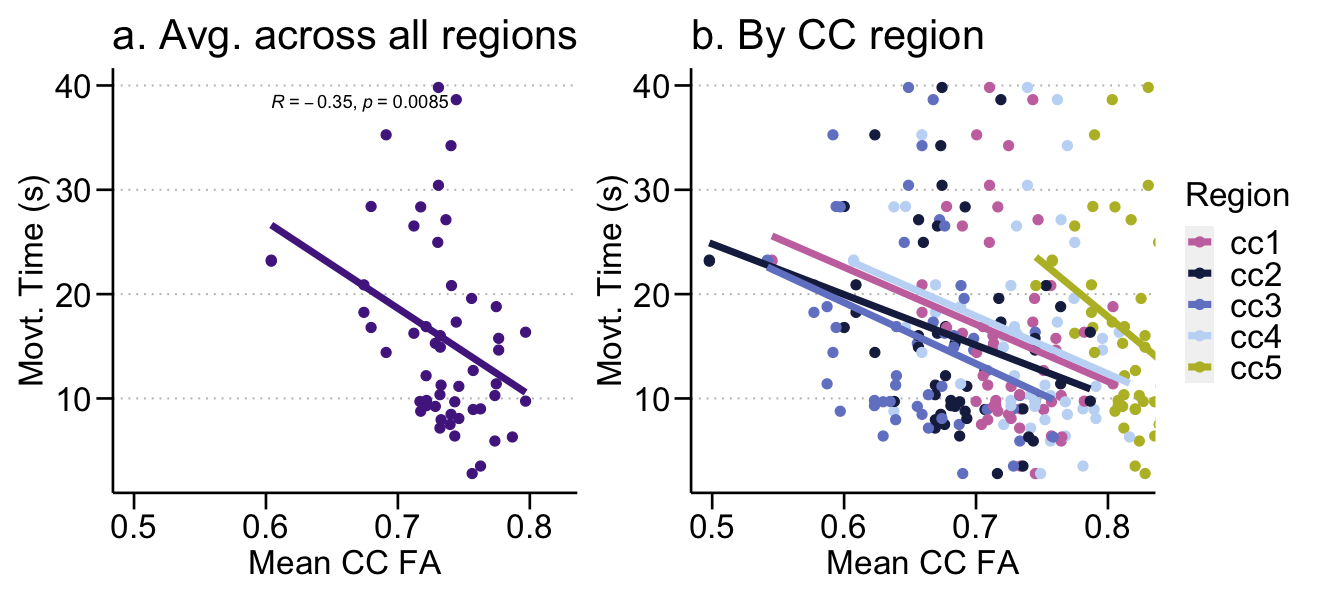

In [103]:
options(repr.plot.width=11, repr.plot.height=5)
new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")


gx1 = ggplot(bmCC_le, aes(y = mt, x = fullCC)) +

geom_point(col = "#54278f",size=2.5,show.legend = TRUE) +
geom_smooth(formula = y~x, fill= NA ,size = 2, col = "#54278f", method="lm") + 
stat_cor() + 
coord_cartesian(xlim = c(0.5,0.82),expand = -0.01) + 
xlab("Mean CC FA") + ylab("Movt. Time (s)") + ggtitle("a. Avg. across all regions") +  
theme_classic2() + setFigThm


gx2 = ggplot(bmCC_le2, aes(y = mt, x = FA_val,col = CC_region)) +

geom_point(aes(col = CC_region),size=2.5,show.legend = TRUE) +
geom_smooth(formula = y~x, fill = NA,alpha = 0.2, size = 2,method="lm") + 
coord_cartesian(xlim = c(0.5,0.82),expand = -0.01) + 
xlab("Mean CC FA") + ylab("Movt. Time (s)") + ggtitle("b. By CC region") + 
scale_color_manual(values = new_cols,name = "Region",labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
scale_fill_manual(values = new_cols,name = "Region",labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
theme_classic2() + setFigThm + theme(legend.position="right") 

display_markdown("## Individual-unadjusted fits from raw data")

gx1 | gx2



## 3. Plot & Test Distributions

## Shapiro-Wilk's Test:

* **for demographic variables**

variable,statistic,p
<chr>,<dbl>,<dbl>
age,0.967,0.162
chronicity,0.719,0.000
mt,0.907,0.001
uefm,0.943,0.015


* **for CC-specific variables**

variable,statistic,p
<chr>,<dbl>,<dbl>
fullCC,0.900,0.000
norm_ccVol,0.969,0.186


* **for other variables of structural damage**

variable,statistic,p
<chr>,<dbl>,<dbl>
cst_fa_ai,0.980,0.523
cst_ll,0.654,0.000
lesion_fa,0.950,0.029
lesionVol,0.700,0.000
ventr_ai,0.962,0.094


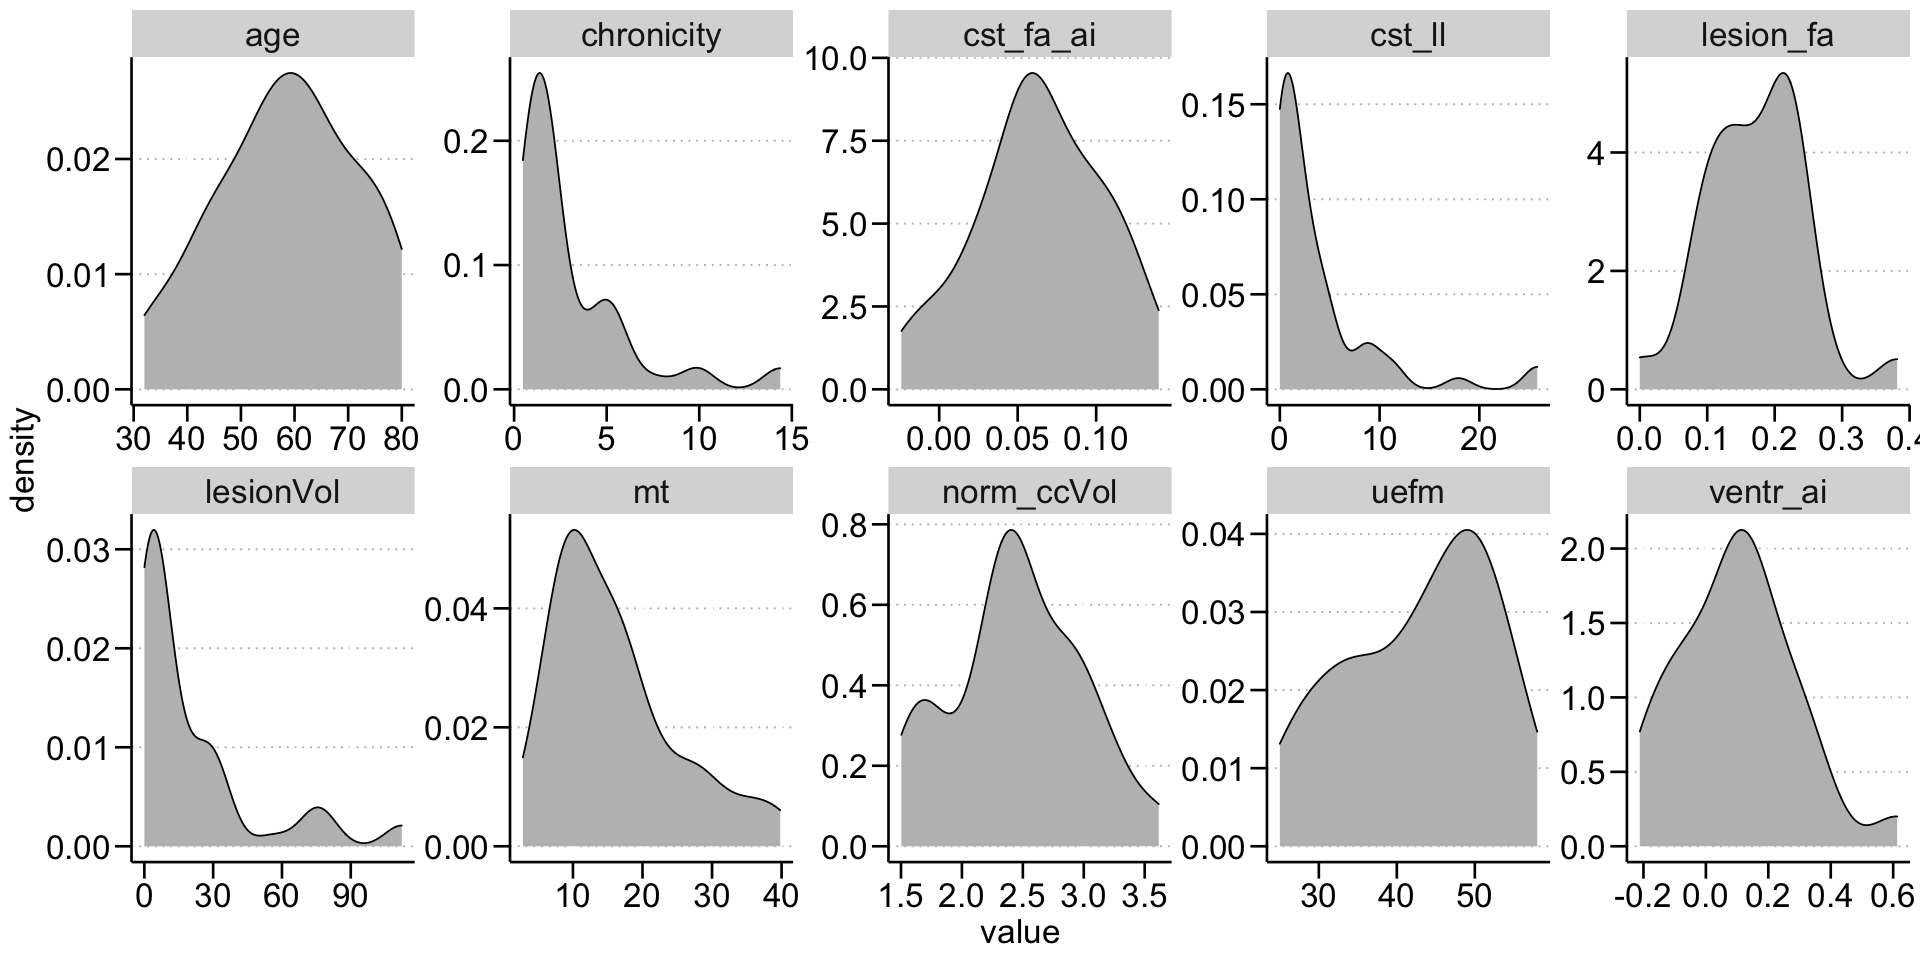

In [104]:
# Plot densities
options(repr.plot.width=16, repr.plot.height=8)

bmCC_le %>%
  select(age,chronicity,uefm,mt,norm_ccVol,lesionVol,cst_fa_ai,cst_ll,ventr_ai,lesion_fa) %>% 
  keep(is.numeric) %>% 
  drop_na() %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free",ncol = 5) +
    geom_density(fill = "gray") + setFigThm

bmCC_le %>%
  keep(is.numeric) %>% 
  drop_na() %>% 
{.->> swTesting}

# Shapiro-Wilk Tests by type of variable
display_markdown("## Shapiro-Wilk's Test:")
display_markdown("* **for demographic variables**")
swTesting %>% 
  shapiro_test(age,chronicity,uefm,mt) %>% mutate_if(is.numeric, round, 3)

display_markdown("* **for CC-specific variables**")
swTesting  %>% 
  shapiro_test(fullCC,norm_ccVol) %>% mutate_if(is.numeric, round, 3)

display_markdown("* **for other variables of structural damage**")
swTesting  %>% 
  shapiro_test(lesionVol,cst_fa_ai,cst_ll,ventr_ai,lesion_fa) %>% mutate_if(is.numeric, round, 3)


## 4a. Mixed Effects Linear Model

To test our hypothesis about the relationship between callosal microstructure and bimanual movement time, the following is our **base model**:

***log* (MT) ~ mean FA + mean FA : CC region + <font color = 'green'> (1 | CC region : Subject) </font>**

* We include FA as our main fixed effects, and suspect that the relationship between FA and movt. time might be moderated by the CC region, so we include an interaction term for that. There is no conceivable reason for mean movt. time to vary based on region independent of the FA value itself. But, in this long-form data, movt. time is repeated 5 times (over CC region), so we need to estimate the variance in intercept related to region-wise and subject-wise random efffects. <br><br>
* Note: The last random-effects term allows for an "additive" shift for each (observed) combination of CC region and subject. In other words, this esssentially allows the random intercepts to interact, so say Subj1 could have CC5>CC3 and Subj3 could have CC3>CC5. The variance will be estimated for both region and region x subj. 

### Best subset selection: Forward, then Backward stepwise selection of predictors.
To this model, we will first add the following covariates in a forward step-wise manner: <br>
1. *log* (Chronicity) <br>
2. UEFM <br>
3. Age <br>
4. Sex
5. Side of lesion
6. Total normalized CC volume ("norm_ccVol") <br>
    
Those covariates that meet a liberal criterion of p <= 0.1 will be preserved in a combined model. The combined model will then be tested by backward stepwise selection process to finally preserve only those variables which provide a signifiantly more informative model.


In [105]:
display_markdown("**Original default contrasts**")
contrasts(factor(bmCC_le2$CC_region))

display_markdown("**Re-leveled contrasts to make motor CC as reference**")
bmCC_le2$CC_region = relevel(factor(bmCC_le2$CC_region), ref = "cc3")
contrasts(factor(bmCC_le2$CC_region))


**Original default contrasts**

,cc2,cc3,cc4,cc5
cc1,0,0,0,0
cc2,1,0,0,0
cc3,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


**Re-leveled contrasts to make motor CC as reference**

,cc1,cc2,cc4,cc5
cc3,0,0,0,0
cc1,1,0,0,0
cc2,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


### 4a.1 Forward stepwise

In [106]:

m0 = suppressMessages(lmer(log(mt) ~ FA_val + (FA_val:CC_region) +  (1|CC_region:subjID), data = bmCC_le2,
                       control = lmerControl(optimizer ="Nelder_Mead")))

# uncomment below and summarize forr BASE model
# summary(m0)

# FORWARD (First) Level

m1 = suppressMessages(update(m0, . ~ . + log(chronicity)))

m2 = suppressMessages(update(m0, . ~ . + uefm))  

m3 = suppressMessages(update(m0, . ~ . + age)) 

m4 = suppressMessages(update(m0, . ~ . + sex))  

m5 = suppressMessages(update(m0, . ~ . + sol))

m6 = suppressMessages(update(m0, . ~ . + norm_ccVol))  

# class(m0) <- "lmerMod"
class(m1) <- "lmerMod"
class(m2) <- "lmerMod"
class(m3) <- "lmerMod"
class(m4) <- "lmerMod"
class(m5) <- "lmerMod"
class(m6) <- "lmerMod"



stargazer(m1,m2,m3,m4,m5,m6,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.1, .01, .001))




                                        Dependent variable:                    
                    -----------------------------------------------------------
                                              log(mt)                          
                       (1)       (2)       (3)       (4)       (5)       (6)   
-------------------------------------------------------------------------------
FA_val              -4.625*** -4.358*** -4.487*** -4.244*** -4.007*** -3.834***
                     (0.835)   (0.886)   (0.873)   (0.869)   (0.895)   (0.872) 
                                                                               
log(chronicity)     0.173***                                                   
                     (0.040)                                                   
                                                                               
uefm                           -0.0002                                         
                               (0.004) 

### 4a.2 Backward stepwise

In [107]:
# BACKWARD (Second) level
# with all the factors that met signficance criteria above
m11 = suppressWarnings(update(m0, . ~ . + log(chronicity) + norm_ccVol + sex))

# removing sex because it was not significant in m11
m12 = suppressWarnings(update(m0, . ~ . + log(chronicity) + norm_ccVol))

# removing norm_ccVol and comparing with m12
m13 = suppressWarnings(update(m0, . ~ . + log(chronicity) + sex))

class(m11) <- "lmerMod"
class(m12) <- "lmerMod"
class(m13) <- "lmerMod"


# stargazer(m11,m12,m13,type = "text",
#           star.char = c("*", "**","***"),
#           star.cutoffs = c(.05, .01, .001))

# display_markdown("<br> **Looks like m11 & m12 are not different from each other,<br> so we can remove 'sex'**")
# lrtest(m11,m12)%>% mutate_if(is.numeric, round, 3); 
# suppressMessages(anova(m11,m12)) %>% mutate_if(is.numeric, round, 3)

# display_markdown("<br><br> **Looks like m12 & m13 are slightly different from each other based at least on the ANOVA, <br> so we can keep 'norm cc volume'**")
# lrtest(m12,m13)%>% mutate_if(is.numeric, round, 3)
# suppressMessages(anova(m12,m13)) %>% mutate_if(is.numeric, round, 3)

dvNames0 = c('Intercept','Mean FA','log(Chronicity)','Total Normalized CC Volume',"Sex (Male)",
             'Mean FA x CC1','Mean FA x CC2','Mean FA x CC4','Mean FA x CC5')
table2 = tab_model(m11,m12,m13,pred.labels = dvNames0)

display_html(head(table2$page.complete))


log(mt) 
 log(mt) 
 log(mt) 
 
 
 Predictors 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 
 
 Intercept 
 5.60 
 4.51 – 6.68 
 <0.001 
 5.66 
 4.60 – 6.72 
 <0.001 
 5.44 
 4.35 – 6.52 
 <0.001 
 
 
 Mean FA 
 -4.17 
 -5.83 – -2.50 
 <0.001 
 -4.20 
 -5.86 – -2.54 
 <0.001 
 -4.57 
 -6.22 – -2.92 
 <0.001 
 
 
 log(Chronicity) 
 0.15 
 0.06 – 0.23 
 0.001 
 0.16 
 0.08 – 0.23 
 <0.001 
 0.16 
 0.08 – 0.25 
 <0.001 
 
 
 Total Normalized CC Volume 
 -0.16 
 -0.30 – -0.02 
 0.022 
 -0.17 
 -0.31 – -0.03 
 0.018 
 
 
 
 
 
 Sex (Male) 
 0.05 
 -0.12 – 0.22 
 0.561 
 
 
 
 0.07 
 -0.10 – 0.24 
 0.434 
 
 
 Mean FA x CC1 
 0.38 
 0.02 – 0.73 
 0.040 
 0.38 
 0.02 – 0.74 
 0.038 
 0.41 
 0.05 – 0.77 
 0.025 
 
 
 Mean FA x CC2 
 0.17 
 -0.18 – 0.51 
 0.342 
 0.17 
 -0.17 – 0.51 
 0.338 
 0.18 
 -0.16 – 0.53 
 0.295 
 
 
 Mean FA x CC4 
 0.45 
 0.08 – 0.82 
 0.017 
 0.45 
 0.08 – 0.82 
 0.016 
 0.49 
 0.12 – 0.86 
 0.009 
 
 
 Mean FA x CC5 
 0.82 
 0.37 – 1.26 
 <0.001 
 0.82 
 0.38 – 1.27 
 <0.001 
 0.90 
 0.45 – 1.34 
 <0.001 
 
 
 Random Effects 
 

 
 σ 2 
 0.19 
 0.19 
 0.19 

 
 τ 00 
 0.09 CC_region:subjID 
 0.09 CC_region:subjID 
 0.10 CC_region:subjID 

 
 ICC 
 0.34 
 0.33 
 0.34 

 
 N 
 5 CC_region 
 5 CC_region 
 5 CC_region 

 
 
 31 subjID 
 31 subjID 
 31 subjID 
 
 Observations 
 270 
 270 
 270 
 
 
 Marginal R 2 / Conditional R 2 
 0.202 / 0.471 
 0.202 / 0.467 
 0.182 / 0.461

## 4b.1 FINAL MODEL: 
***log* (MT) ~ Mean FA + Mean FA : CC region + *log* (Chronicity) + Total CC Volume + <font color = 'green'> (1 | CC region : Subject)</font>**

In [108]:
m12 = suppressMessages(lmer(log(mt) ~ FA_val + FA_val:CC_region + log(chronicity) + norm_ccVol +
                                     (1|CC_region:subjID), data = bmCC_le2))
#                        control = lmerControl(optimizer ="Nelder_Mead")))

# class(m12) <- "lmerMod"

dvNames1 = c('Mean FA','log(Chronicity)','Total Normalized CC Volume',
            'FA: CC2','FA: CC3','FA: CC4','FA: CC5','Intercept')


# stargazer(m12,type = "text",
#           star.char = c("*", "**","***"),
#           star.cutoffs = c(.05, .01, .001),
#           digit.separator = "",single.row=TRUE,
#           dep.var.labels = c('Bimanual MT'),
# #           covariate.labels = dvNames0,
#           title = "Brain-Behavior Relationship")

finalMod = tab_model(m12,pred.labels = dvNames1)
display_html(head(finalMod$page.complete))


# Plot regression
# options(repr.plot.width=6.5, repr.plot.height=5)

# new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")

# fitted = visreg(m12, xvar = "FA_val", by = "CC_region",
#                 strip.names = FALSE,
#                 points=list(size=2,alpha = 0.4),line=list(size=2.5),
#                 overlay = TRUE, gg = TRUE)

# display_markdown("## <br> 4b.2 Model-adjusted fits & predicted values")
# Bm=suppressMessages(fitted + scale_color_manual(values = new_cols ,name = "Region",
#                                              labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
#                            coord_cartesian(xlim = c(0.5,0.9),,ylim=c(1.5,3.75),expand = -0.01) + 
#                            labs(x = "Mean FA", y = "bimanual MT\n(log-s)") +                          
#                            guides(fill=FALSE) + setFigThm + theme(legend.position="right",
#                                                                   plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")))

# Bm

log(mt) 
 
 
 Predictors 
 Estimates 
 CI 
 p 
 
 
 Mean FA 
 5.66 
 4.60 – 6.72 
 <0.001 
 
 
 log(Chronicity) 
 -4.20 
 -5.86 – -2.54 
 <0.001 
 
 
 Total Normalized CC Volume 
 0.16 
 0.08 – 0.23 
 <0.001 
 
 
 FA: CC2 
 -0.17 
 -0.31 – -0.03 
 0.018 
 
 
 FA: CC3 
 0.38 
 0.02 – 0.74 
 0.038 
 
 
 FA: CC4 
 0.17 
 -0.17 – 0.51 
 0.338 
 
 
 FA: CC5 
 0.45 
 0.08 – 0.82 
 0.016 
 
 
 Intercept 
 0.82 
 0.38 – 1.27 
 <0.001 
 
 
 Random Effects 
 

 
 σ 2 
 0.19 

 
 τ 00 CC_region:subjID 
 0.09 

 
 ICC 
 0.33 

 
 N CC_region 
 5 

 
 N subjID 
 31 
 
 Observations 
 270 
 
 
 Marginal R 2 / Conditional R 2 
 0.202 / 0.467

## July 29, 2021 -- AFTER COMMENTS FROM REVIEWERS


In [109]:
#### July 29, 2021 -- AFTER COMMENTS FROM REVIEWERS
# filtering out
bmCC  %>%
#filter(strat=="unimanual") %>%
#select(-c(IpPrAvg,IpDistAvg,CoPrAvg,CoDistAvg)) %>%
filter(taskC=="let") %>%

{.->>bmCC_leU}

bmCC_leU %>%
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>%
{.->> bmCC_leU2}

# head(bmCC_leU2,5) %>% mutate_if(is.numeric, round, 3)


# TABLE 2
quietly(contrasts(factor(bmCC_leU2$CC_region)))
bmCC_leU2$CC_region = relevel(factor(bmCC_leU2$CC_region), ref = "cc3")
contrasts(factor(bmCC_leU2$CC_region))
contrasts(factor(bmCC_leU2$strat))


m12_U = lmer(log(mt) ~ (FA_val*strat) + (FA_val:CC_region) + log(chronicity) + norm_ccVol +
            (1|CC_region:subjID), data = bmCC_leU2)          
 
dvNames2 = c('Intercept','Mean FA','Strategy','log(Chronicity)','Total Normalized CC Volume', 
             'Mean FA x Strategy','Mean FA x CC1','Mean FA x CC2','Mean FA x CC4','Mean FA x CC5')

finalMod = tab_model(m12_U,pred.labels = dvNames2)
display_html(head(finalMod$page.complete))


           


function (...) 
capture_output(.f(...))
<bytecode: 0x7fa5d209faf8>
<environment: 0x7fa5ecc22cf8>

,cc1,cc2,cc4,cc5
cc3,0,0,0,0
cc1,1,0,0,0
cc2,0,1,0,0
cc4,0,0,1,0
cc5,0,0,0,1


,unimanual
bimanual,0
unimanual,1


log(mt) 
 
 
 Predictors 
 Estimates 
 CI 
 p 
 
 
 Intercept 
 5.05 
 4.05 – 6.05 
 <0.001 
 
 
 Mean FA 
 -3.60 
 -5.15 – -2.06 
 <0.001 
 
 
 Strategy 
 -1.87 
 -3.96 – 0.21 
 0.078 
 
 
 log(Chronicity) 
 0.16 
 0.08 – 0.23 
 <0.001 
 
 
 Total Normalized CC Volume 
 -0.06 
 -0.19 – 0.06 
 0.337 
 
 
 Mean FA x Strategy 
 2.82 
 0.01 – 5.62 
 0.049 
 
 
 Mean FA x CC1 
 0.27 
 -0.04 – 0.59 
 0.092 
 
 
 Mean FA x CC2 
 0.13 
 -0.18 – 0.43 
 0.418 
 
 
 Mean FA x CC4 
 0.33 
 -0.00 – 0.66 
 0.053 
 
 
 Mean FA x CC5 
 0.61 
 0.20 – 1.01 
 0.003 
 
 
 Random Effects 
 

 
 σ 2 
 0.28 

 
 τ 00 CC_region:subjID 
 0.03 

 
 ICC 
 0.10 

 
 N CC_region 
 5 

 
 N subjID 
 33 
 
 Observations 
 330 
 
 
 Marginal R 2 / Conditional R 2 
 0.144 / 0.227

Package `effects` is not available, but needed for `ggeffect()`. Either install package `effects`, or use `ggpredict()`. Calling `ggpredict()` now.FALSE

Could not compute variance-covariance matrix of predictions. No confidence intervals are returned.

Model has log-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the log-scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Package `effects` is not available, but needed for `ggeffect()`. Either install package `effects`, or use `ggpredict()`. Calling `ggpredict()` now.FALSE

Model has log-transformed response. Back-transforming predictions to original response scale. Standard errors are still on the log-scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the exi

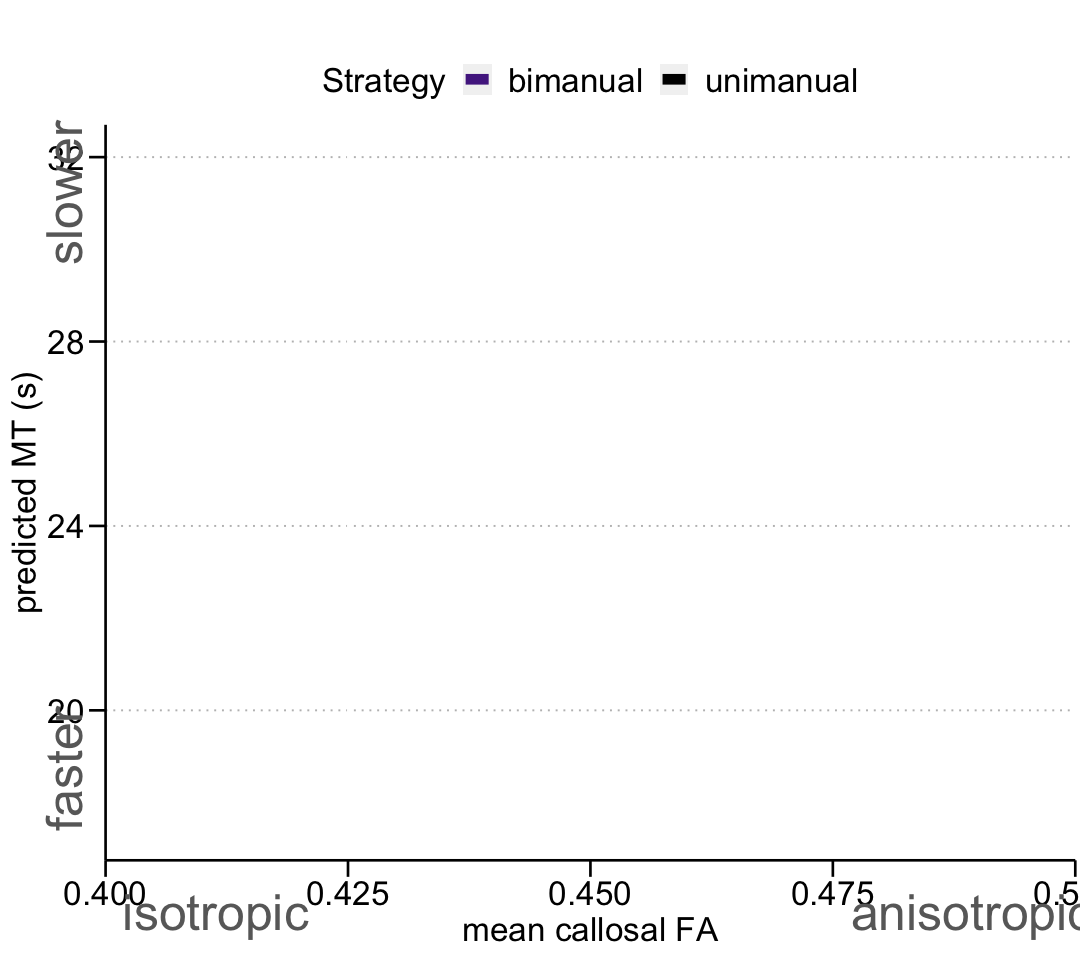

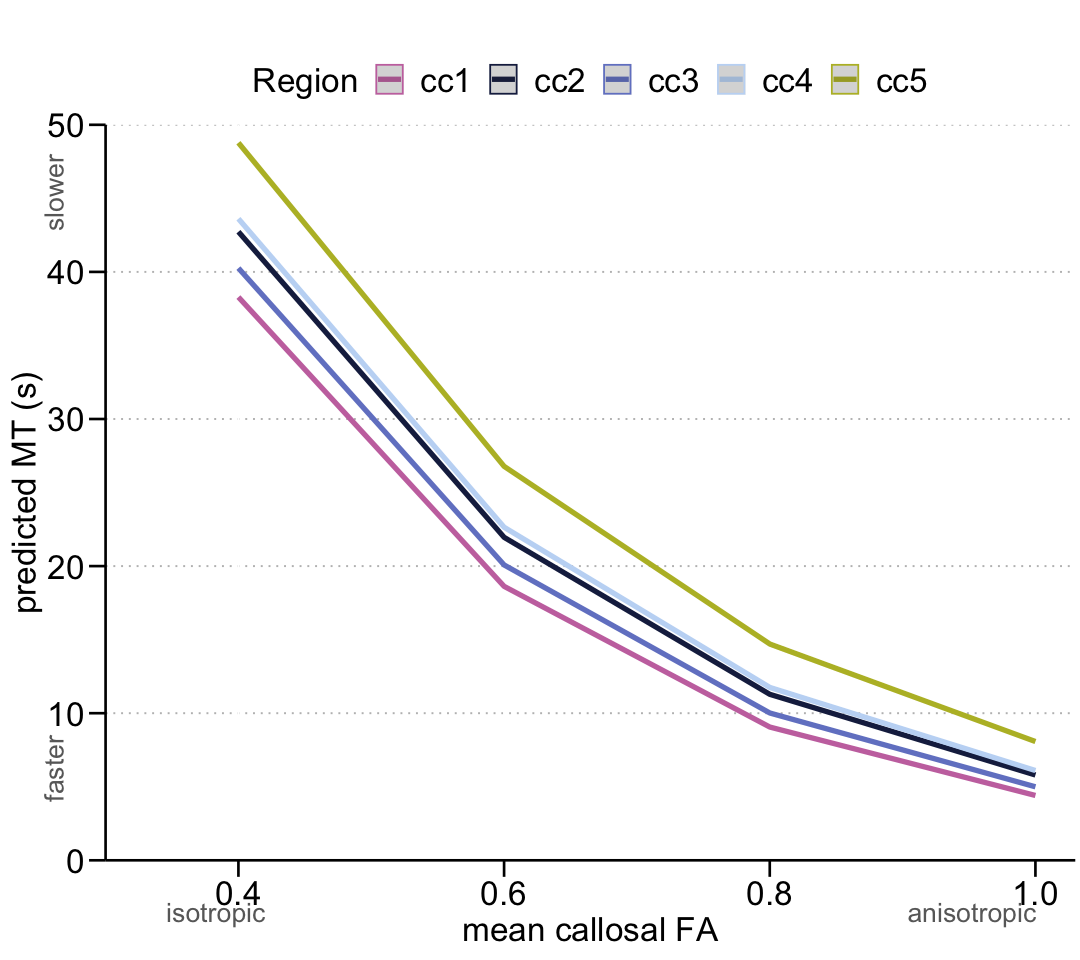

In [125]:

# NEW FIGURE 3A
options(repr.plot.width=9, repr.plot.height=8)

#[0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90.95]
plot_model(m12_U, type = "eff", terms = c("FA_val [0.45:0.9]", "strat"),line.size = 3,title="") +
scale_color_manual(values =c("#54278f","black"), name = "Strategy",
                            labels = c("bimanual", "unimanual")) +
                            labs(x = "mean callosal FA", y = "predicted MT (s)") +
                            
scale_fill_manual(values =c("#54278f","black"), name = "Strategy",
                            labels = c("bimanual", "unimanual")) +
                            labs(x = "mean callosal FA", y = "predicted MT (s)") +
                            
guides(fill="none") + setFigThm + theme(legend.position="top", plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")) 
grid.text("faster", x = unit(c(0.06), "npc"), y = unit(c(0.2), "npc"), rot = 90,
           gp = gpar(fontsize = 30, col = "dimgray"))
grid.text("slower", x = unit(c(0.06), "npc"), y = unit(c(0.8), "npc"), rot = 90,
           gp = gpar(fontsize = 30,col = "dimgray"))
grid.text("anisotropic", x = unit(c(0.9), "npc"), y = unit(c(0.05), "npc"),
           gp = gpar(fontsize = 30,col = "dimgray"))
grid.text("isotropic", x = unit(c(0.2), "npc"), y = unit(c(0.05), "npc"),
           gp = gpar(fontsize = 30,col = "dimgray"))

# NEW FIGURE 3B

plot_model(m12_U, type = "eff", terms = c("FA_val","CC_region"),line.size = 1.5,title = "") + 
coord_cartesian(xlim = c(0.3,1.03),ylim = c(0,50),expand = 0) +
scale_color_manual(values =new_cols, name = "Region",
                            labels = c("cc1", "cc2","cc3","cc4","cc5")) +
                            labs(x = "mean callosal FA", y = "predicted MT (s)") +

guides(fill="none") + setFigThm + theme(legend.position="top", plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")) 
grid.text("faster", x = unit(c(0.05), "npc"), y = unit(c(0.2), "npc"), rot = 90,
           gp = gpar(fontsize = 16, col = "dimgray"))
grid.text("slower", x = unit(c(0.05), "npc"), y = unit(c(0.8), "npc"), rot = 90,
           gp = gpar(fontsize = 16,col = "dimgray"))
grid.text("anisotropic", x = unit(c(0.9), "npc"), y = unit(c(0.05), "npc"),
           gp = gpar(fontsize = 16,col = "dimgray"))
grid.text("isotropic", x = unit(c(0.2), "npc"), y = unit(c(0.05), "npc"),
           gp = gpar(fontsize = 16,col = "dimgray"))

 

In [111]:
emtrends(m12_U,~strat,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

emtrends(m12_U,~CC_region,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

,strat,FA_val.trend,SE,df,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bimanual,-3.337,0.718,158.914,-4.648,0.000
2,unimanual,-0.518,1.550,303.126,-0.334,0.738


,CC_region,FA_val.trend,SE,df,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cc3,-2.194,1.033,235.713,-2.124,0.035
2,cc1,-1.919,0.974,242.587,-1.971,0.050
3,cc2,-2.068,1.005,238.691,-2.058,0.041
4,cc4,-1.868,0.959,243.884,-1.947,0.053
5,cc5,-1.588,0.900,251.648,-1.765,0.079


[1] "dose_2025" "dose_2025" "dose_2025" "dose_2025" "dose_2025"

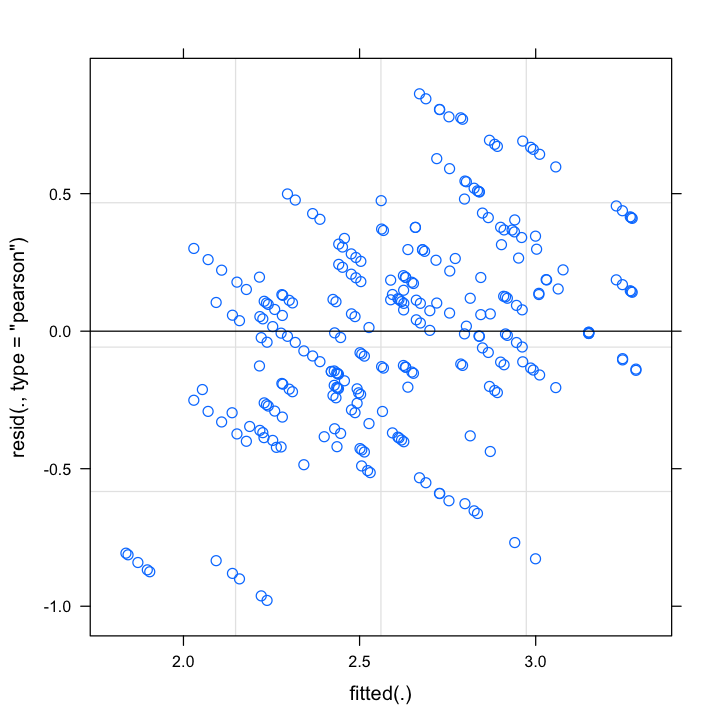

[1] 1.765876

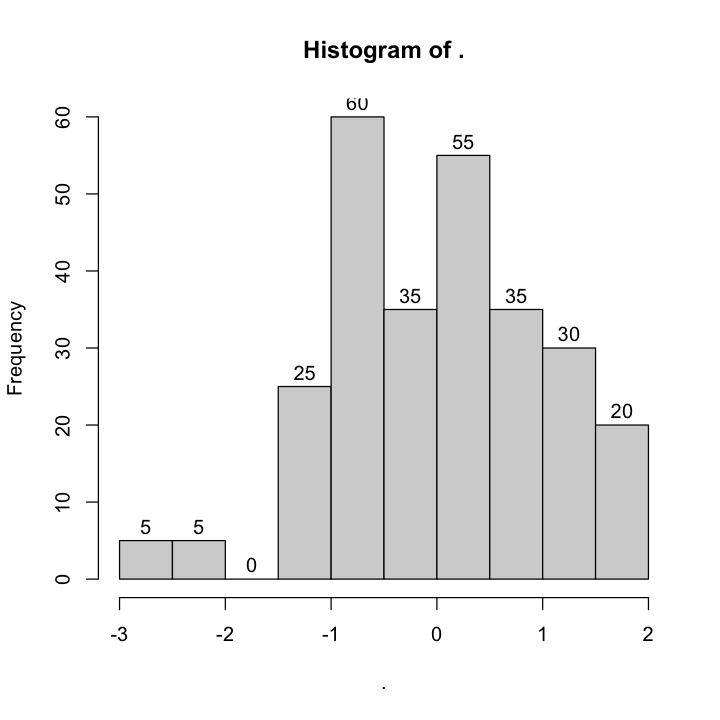

In [112]:
options(repr.plot.width=6, repr.plot.height=6)

plot(m12)
# infl <- influence(m12, obs = TRUE)

# infl
# cooks.distance(infl)

# plot(infl, which = "cook")
# cooks.distance(infl) >0.03

bmCC_le2$subjID[81:85]
scale(log(bmCC_le2$mt),scale=TRUE,center=TRUE)  %>% 
hist(labels = TRUE) #[81:85]

mean(log(bmCC_le2$mt)) - 1.4688*sd(log(bmCC_le2$mt))
# scale(log(bmCC_le2$mt),scale=TRUE,center=TRUE)>2

## At this stage, use robust LMER outside this notebook to run the robust analysis that will reduce the weight of any outlying values.

    File name: sjPlot_tables_figs_v2.R
    Make sure to change root folder appropriately. 

## 4c. Bootstrap 95% confidence intervals

In [113]:
suppressMessages(confint(m12_U, oldNames=FALSE, 
                         method = "boot",boot.type = "basic",nsim = 1000))


,2.5 %,97.5 %
sd_(Intercept)|CC_region:subjID,0.05051740,0.35004400
sigma,0.48472793,0.59825505
(Intercept),4.05539575,5.94406068
FA_val,-5.14615448,-2.03049373
stratunimanual,-3.91419997,0.27990457
log(chronicity),0.08585040,0.22335713
norm_ccVol,-0.19077826,0.06845133
FA_val:stratunimanual,-0.07798516,5.56226511
FA_val:CC_regioncc1,-0.02960797,0.57598765
FA_val:CC_regioncc2,-0.15654906,0.41031241


## 4d. Lastly, let's look at pairwise contrasts of estimated marginal trends for each CC region

In [114]:
emtrends(m12_U,~CC_region,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

suppressWarnings(emtrends(m12_U, "CC_region", var = "FA_val")) %>% pairs() %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)


,CC_region,FA_val.trend,SE,df,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cc3,-2.194,1.033,235.713,-2.124,0.035
2,cc1,-1.919,0.974,242.587,-1.971,0.050
3,cc2,-2.068,1.005,238.691,-2.058,0.041
4,cc4,-1.868,0.959,243.884,-1.947,0.053
5,cc5,-1.588,0.900,251.648,-1.765,0.079


,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cc3 - cc1,-0.274,0.163,156.999,-1.687,0.445
2,cc3 - cc2,-0.125,0.155,155.892,-0.810,0.927
3,cc3 - cc4,-0.326,0.168,158.028,-1.933,0.304
4,cc3 - cc5,-0.605,0.206,161.219,-2.932,0.031
5,cc1 - cc2,0.149,0.149,155.936,0.998,0.856
6,cc1 - cc4,-0.051,0.141,155.720,-0.363,0.996
7,cc1 - cc5,-0.331,0.158,158.920,-2.100,0.225
8,cc2 - cc4,-0.200,0.152,156.703,-1.313,0.684
9,cc2 - cc5,-0.480,0.182,160.144,-2.634,0.069


## 4e. Diagnostics: Multicollinearity

In the above model, there is a strong correlation between FA of different CC regions, but this does not affect the model as shown by the VIF below

,GVIF,Df,GVIF^(1/(2*Df))
FA_val,2.875224,1,1.695649
log(chronicity),1.041392,1,1.020486
norm_ccVol,1.076879,1,1.037728
FA_val:CC_region,2.815502,4,1.138137


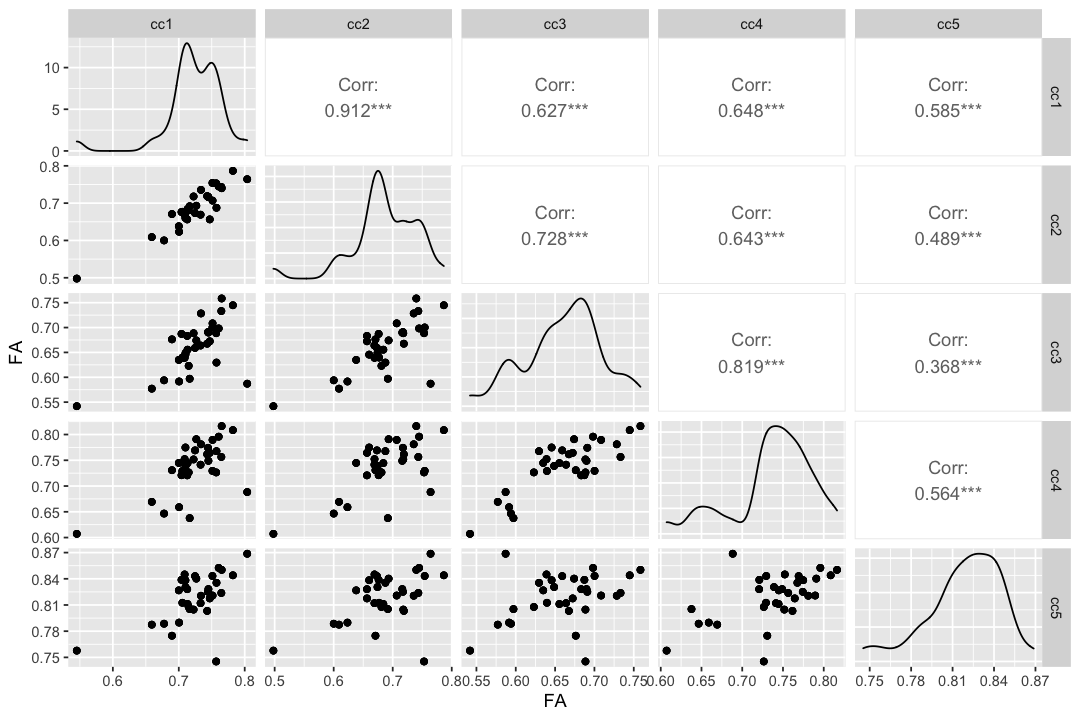

In [115]:
options(repr.plot.width=9, repr.plot.height=6);
ggpairs(bmCC[, c("cc1", "cc2", "cc3","cc4","cc5")]) + ylab("FA") + xlab("FA")   
display_markdown("In the above model, there is a strong correlation between FA of different CC regions, but this does not affect the model as shown by the VIF below")
vif(m12)


# 3b. Do traditional metrics of unilateral structural damage provided any additional explanatory power to the CC metrics-only model?
We answer this question by adding the following covariates one-by-one to our above FINAL model: (for definitions see Kim et al (2020) paper in review)

1. CST FA asymmetry index ("**cst_fa_ai**") <br>
2. CST lesion load ("**cst_ll**") <br>
3. Lesion volume ("**lesionVol**") <br>
4. Lesion FA ("**lesion_fa**") <br>
5. Lateral ventricular volume asymmetry index ("**ventr_ai**") <br>

In [116]:
up1 = suppressMessages(update(m12_U, . ~ . + cst_fa_ai))
up2 = suppressMessages(update(m12_U, . ~ . + cst_ll))
up3 = suppressMessages(update(m12_U, . ~ . + lesionVol))
up4 = suppressMessages(update(m12_U, . ~ . + lesion_fa))
up5 = suppressMessages(update(m12_U, . ~ . + ventr_ai))

class(up1) <- "lmerMod"
class(up2) <- "lmerMod"
class(up3) <- "lmerMod"
class(up4) <- "lmerMod"
class(up5) <- "lmerMod"

# stargazer(up1,up2,up3,up4,up5,type = "text",
#                    star.cutoffs = c(.05, .01, .001))
suppl_tab = tab_model(up1,up2,up3,up4,up5)
display_html(head(suppl_tab$page.complete))



log(mt) 
 log(mt) 
 log(mt) 
 log(mt) 
 log(mt) 
 
 
 Predictors 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 Estimates 
 CI 
 p 
 
 
 (Intercept) 
 5.25 
 4.29 – 6.21 
 <0.001 
 5.36 
 4.41 – 6.31 
 <0.001 
 4.60 
 3.54 – 5.66 
 <0.001 
 5.38 
 4.43 – 6.34 
 <0.001 
 5.48 
 4.55 – 6.41 
 <0.001 
 
 
 FA_val 
 -3.68 
 -5.19 – -2.18 
 <0.001 
 -3.97 
 -5.48 – -2.47 
 <0.001 
 -2.96 
 -4.59 – -1.33 
 <0.001 
 -3.51 
 -4.99 – -2.03 
 <0.001 
 -4.10 
 -5.55 – -2.65 
 <0.001 
 
 
 strat [unimanual] 
 -3.07 
 -5.80 – -0.33 
 0.028 
 -3.23 
 -5.96 – -0.51 
 0.020 
 -1.72 
 -3.80 – 0.35 
 0.103 
 -3.11 
 -5.83 – -0.39 
 0.025 
 -2.93 
 -5.59 – -0.27 
 0.031 
 
 
 chronicity [log] 
 0.12 
 0.05 – 0.20 
 0.001 
 0.14 
 0.07 – 0.22 
 <0.001 
 0.16 
 0.09 – 0.23 
 <0.001 
 0.12 
 0.04 – 0.19 
 0.002 
 0.13 
 0.06 – 0.20 
 <0.001 
 
 
 norm_ccVol 
 -0.11 
 -0.24 – 0.02 
 0.085 
 -0.10 
 -0.23 – 0.02 
 0.114 
 -0.07 
 -0.20 – 0.05 
 0.240 
 -0.15 
 -0.28 – -0.02 
 0.026 
 -0.13 
 -0.25 – -0.00 
 0.045 
 
 
 cst_fa_ai 
 -0.04 
 -1.76 – 1.67 
 0.961 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 FA_val * strat [unimanual] 
 3.98 
 0.31 – 7.66 
 0.034 
 4.19 
 0.53 – 7.86 
 0.025 
 2.58 
 -0.22 – 5.37 
 0.070 
 4.02 
 0.37 – 7.67 
 0.031 
 3.74 
 0.16 – 7.32 
 0.040 
 
 
 FA_val * CC_regioncc1 
 0.30 
 -0.02 – 0.62 
 0.068 
 0.32 
 0.01 – 0.64 
 0.046 
 0.22 
 -0.10 – 0.54 
 0.170 
 0.28 
 -0.03 – 0.60 
 0.079 
 0.34 
 0.03 – 0.65 
 0.032 
 
 
 FA_val * CC_regioncc2 
 0.14 
 -0.17 – 0.44 
 0.382 
 0.15 
 -0.16 – 0.45 
 0.342 
 0.10 
 -0.20 – 0.40 
 0.504 
 0.13 
 -0.17 – 0.43 
 0.398 
 0.15 
 -0.14 – 0.45 
 0.309 
 
 
 FA_val * CC_regioncc4 
 0.35 
 0.02 – 0.68 
 0.039 
 0.38 
 0.05 – 0.70 
 0.024 
 0.26 
 -0.07 – 0.59 
 0.119 
 0.33 
 0.00 – 0.66 
 0.047 
 0.40 
 0.08 – 0.72 
 0.015 
 
 
 FA_val * CC_regioncc5 
 0.65 
 0.25 – 1.04 
 0.001 
 0.70 
 0.30 – 1.09 
 0.001 
 0.49 
 0.08 – 0.90 
 0.020 
 0.61 
 0.22 – 1.01 
 0.002 
 0.73 
 0.35 – 1.12 
 <0.001 
 
 
 cst_ll 
 
 
 
 0.01 
 -0.00 – 0.02 
 0.073 
 
 
 
 
 
 
 
 
 
 
 
 lesionVol 
 
 
 
 
 
 
 0.00 
 0.00 – 0.00 
 0.025 
 
 
 
 
 
 
 
 
 lesion_fa 
 
 
 
 
 
 
 
 
 
 -0.89 
 -1.81 – 0.04 
 0.059 
 
 
 
 
 
 ventr_ai 
 
 
 
 
 
 
 
 
 
 
 
 
 0.70 
 0.35 – 1.05 
 <0.001 
 
 
 Random Effects 
 

 
 σ 2 
 0.30 
 0.30 
 0.28 
 0.30 
 0.29 

 
 τ 00 
 0.00 CC_region:subjID 
 0.00 CC_region:subjID 
 0.03 CC_region:subjID 
 0.00 CC_region:subjID 
 0.00 CC_region:subjID 

 
 ICC 
 0.02 
 0.00 
 0.09 
 0.00 
   

 
 N 
 5 CC_region 
 5 CC_region 
 5 CC_region 
 5 CC_region 
 5 CC_region 

 
 
 29 subjID 
 29 subjID 
 33 subjID 
 29 subjID 
 29 subjID 
 
 Observations 
 290 
 290 
 330 
 290 
 290 
 
 
 Marginal R 2 / Conditional R 2 
 0.147 / 0.161 
 0.157 / 0.160 
 0.158 / 0.231 
 0.158 / 0.159 
 0.190 / NA

## Model comparisons with LR Test

In [117]:
up21 = suppressMessages(update(m12, . ~ . + ventr_ai + cst_ll + lesion_fa))
up22 = suppressMessages(update(m12, . ~ . + ventr_ai + lesion_fa))
up22_U = suppressMessages(update(m12_U, . ~ . + ventr_ai + lesionVol))

tab_model(up22_U)

class(up21) <- "lmerMod"

stargazer(up2,up5,up21,type = "text",
                   star.cutoffs = c(.05, .01, .001))


display_markdown("## * COMBINED model is significantly better than model with Ventr_AI alone")
lrtest(up5,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up5,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * COMBINED model is also significantly better than model with Lesion_FA alone")
lrtest(up4,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up2,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * COMBINED model is also significantly better than model with Lesion_FA alone")
lrtest(up2,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up2,up21))%>% mutate_if(is.numeric, round, 3)

display_markdown("## * Model with all 3 slightly better than Ventr_AI + Lesion_FA")
lrtest(up21,up22)%>% mutate_if(is.numeric, round, 3)
suppressMessages(anova(up22,up21))%>% mutate_if(is.numeric, round, 3)



                            Dependent variable:      
                      -------------------------------
                                  log(mt)            
                         (1)        (2)        (3)   
-----------------------------------------------------
FA_val                -3.973***  -4.101***  -4.842***
                       (0.768)    (0.742)    (0.805) 
                                                     
stratunimanual         -3.231*    -2.930*            
                       (1.391)    (1.359)            
                                                     
log(chronicity)        0.145***   0.129***  0.185*** 
                       (0.038)    (0.036)    (0.041) 
                                                     
norm_ccVol              -0.103    -0.127*    -0.171* 
                       (0.065)    (0.063)    (0.072) 
                                                     
cst_ll                  0.011                 0.014  
                       (0.0

## * COMBINED model is significantly better than model with Ventr_AI alone

ERROR: Error in lrtest.default(up5, up22): models were not all fitted to the same size of dataset


In [ ]:
options(repr.plot.width=4, repr.plot.height=4);
# ggpairs(bmCC[, c("fullCC", "lesion_fa", "ventr_ai","cst_ll","cst_fa_ai")]) #ylab("FA") + xlab("FA")   

cor.test(bmCC$cst_ll,bmCC$ventr_ai,method="pearson")
plot(bmCC$cst_ll,bmCC$ventr_ai)

***
# What about those who use a unimanual strategy for the letter-envelope tasks?
**Note that the number of subjects who used a unimanual strategy for the letter-envelope task was much smaller, so these results should be interpreted with caution.**


In [ ]:
bmCCU = read.csv("1_stroke_bmCC_corr.csv")

# filtering out 
bmCCU  %>% 
filter(strat=="unimanual") %>% 
# select(-c(IpPrAvg,IpDistAvg,CoPrAvg)) %>% 
filter(taskC=="let") %>% 

{.->>bmCC_leU}

bmCC_leU %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->> bmCC_leU2}

head(bmCC_leU2,10) %>% mutate_if(is.numeric, round, 3) 

# dim(bmCC_leU2)

In [ ]:
display_markdown("**Original default contrasts**")
contrasts(factor(bmCC_leU2$CC_region))

display_markdown("**Re-leveled contrasts to make motor CC as reference**")
bmCC_leU2$CC_region = relevel(factor(bmCC_leU2$CC_region), ref = "cc3")
contrasts(factor(bmCC_leU2$CC_region))


In [ ]:
m12U = suppressMessages(lmer(log(mt) ~ FA_val + FA_val:CC_region + log(chronicity) + sex + norm_ccVol + 
                                     (1|CC_region:subjID), data = bmCC_leU2,
                       control = lmerControl(optimizer ="Nelder_Mead")))

class(m12U) <- "lmerMod"

dvNames0 = c('Mean FA','log(Chronicity)','Total Normalized CC Volume',
            'FA: CC2','FA: CC3','FA: CC4','FA: CC5','Intercept')

stargazer(m12U,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.05, .01, .001),
          digit.separator = "",single.row=TRUE,
          dep.var.labels = c('Unimanual MT'),
#           covariate.labels = dvNames0,
          title = "Brain-Behavior Relationship")

# Plot regression
options(repr.plot.width=6.5, repr.plot.height=5)

new_cols <- c("#C874AE", "#19264E", "#7384CB", "#C2D9F5", "#B8BA2F")

fitted = visreg(m12U, xvar = "FA_val", by = "CC_region",
                strip.names = FALSE, 
                points=list(size=2,alpha = 0.4),line=list(size=2.5),
                overlay = TRUE, gg = TRUE)

display_markdown("## <br> 4b.2 Model-adjusted fits & predicted values")
Um = suppressMessages(fitted + scale_color_manual(values = new_cols,name = "Region",
                                             labels = c("cc1", "cc2","cc3","cc4","cc5")) + 
                           coord_cartesian(xlim = c(0.5,0.9),ylim=c(1.5,4),expand = -0.01) + 
                           labs(x = "Mean FA", y = "unimanual MT\n(log-s)") +                          
                           guides(fill=FALSE) + setFigThm + theme(legend.position="right",
                                                                  plot.margin = unit(c(0.1,0.1,0.25,0.25), "cm")))



In [ ]:
emtrends(m12U,~CC_region,var="FA_val",infer=TRUE) %>% test() %>% 
mutate_if(is.numeric, round, 3)

suppressWarnings(emtrends(m12U, "CC_region", var = "FA_val")) %>% pairs() %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)



In [ ]:
options(repr.plot.width=11, repr.plot.height=7)

Bm | Um

***
# Analysis 2: Comparing CC microstructure between chronic stroke survivors and neurologically intact adults


## 1. Import & Reorganize Data

In [3]:
ccGrps = read.csv("2_threeGrp_CC.csv")
ccGrps$grp = factor(ccGrps$grp, levels=c('younger','older','stroke'))

tail(ccGrps,5) %>% mutate_if(is.numeric, round, 3)

ccGrps  %>% 
pivot_longer(cols = c("cc1","cc2","cc3","cc4","cc5"),"CC_region",values_to = "FA_val")%>% 
{.->>ccGrps2}

ccGrps2$grp = factor(ccGrps2$grp, levels=c('younger','older','stroke'))

tail(ccGrps2,10) %>% mutate_if(is.numeric, round, 3)

mean(ccGrps$cc2[ccGrps$grp=="stroke"])
ccGrps %>% 
filter(subjID=="dose_2037") %>% 
select(cc5)


,subjID,grp,scanner,sex,age,cc1,cc2,cc3,cc4,cc5,fullCC,sol
,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
89,dose_2037,stroke,hsc,male,80,0.690,0.671,0.676,0.731,0.775,0.712,LHD
90,dose_2038,stroke,hsc,male,60,0.705,0.621,0.589,0.651,0.790,0.692,RHD
91,dose_2039,stroke,hsc,male,69,0.720,0.648,0.655,0.768,0.830,0.729,RHD
92,dose_2040,stroke,hsc,male,72,0.745,0.730,0.728,0.770,0.833,0.767,RHD
93,dose_2041,stroke,hsc,female,55,0.761,0.745,0.698,0.796,0.852,0.776,LHD


subjID,grp,scanner,sex,age,fullCC,sol,CC_region,FA_val
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
dose_2040,stroke,hsc,male,72,0.767,RHD,cc1,0.745
dose_2040,stroke,hsc,male,72,0.767,RHD,cc2,0.730
dose_2040,stroke,hsc,male,72,0.767,RHD,cc3,0.728
dose_2040,stroke,hsc,male,72,0.767,RHD,cc4,0.770
dose_2040,stroke,hsc,male,72,0.767,RHD,cc5,0.833
dose_2041,stroke,hsc,female,55,0.776,LHD,cc1,0.761
dose_2041,stroke,hsc,female,55,0.776,LHD,cc2,0.745
dose_2041,stroke,hsc,female,55,0.776,LHD,cc3,0.698
dose_2041,stroke,hsc,female,55,0.776,LHD,cc4,0.796


[1] 0.6865702

cc5
<dbl>
0.774801


## 2. Plot

`geom_smooth()` using formula 'y ~ x'



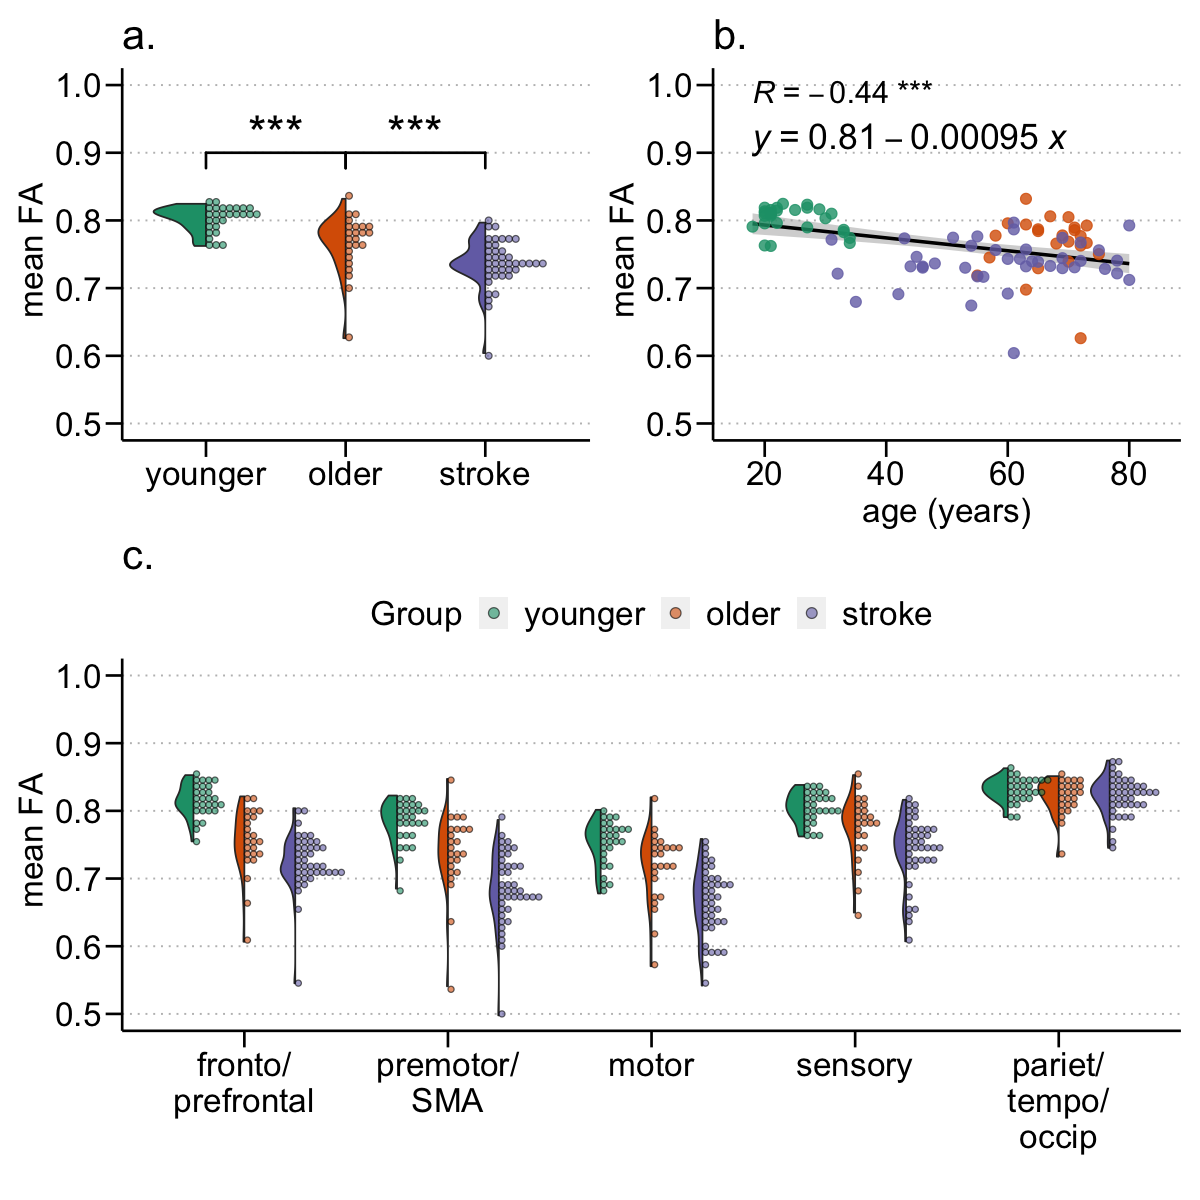

In [4]:
options(repr.plot.width=10, repr.plot.height=10)

my_comparisons <- list(c("younger","older"),c("older","stroke"))
reg <- c("fronto/\nprefrontal","premotor/\nSMA",'motor','sensory','pariet/\ntempo/\noccip')
gr <- c("younger", "older","stroke")


Fig1A = ggplot(ccGrps, aes(x = grp, y = fullCC, fill = grp)) +
          geom_half_violin(alpha = 1,show.legend = FALSE) + 
          geom_half_dotplot(binwidth = 1/110, dotsize = 1.1, alpha = 0.6, method = "histodot", show.legend = FALSE) +
          scale_fill_brewer(palette = "Dark2") + scale_color_brewer(palette = "Dark2") + 
          stat_compare_means(comparisons = my_comparisons, label = "p.signif",bracket.size = 0.75,
                             tip.length = 0.1, size = 10, label.y = 0.9,label.x = 0.5,
                             symnum.args=list(cutpoints = c(0, 0.001, 0.01, 0.05, 1), 
                                              symbols = c("***", "**", "*", "ns"))) + 
          coord_cartesian(ylim = c(0.5,1),expand = -0.5) + 
          xlab("") + ylab(" mean FA") + ggtitle("a. ") + 
          scale_x_discrete(labels= gr) + setFigThm


Fig1B = ggplot(ccGrps, aes(x = age,y = fullCC)) +
        geom_smooth(alpha = 0.5,fill = "darkgray",col = "black", method="lm",show.legend = FALSE) + 
        geom_point(aes(col = grp),size=2.75,alpha = 0.8, show.legend = FALSE) +

        stat_cor(aes(label = paste(..r.label.., cut(..p.., breaks = c(-Inf, 0.0001, 0.001, 0.01, 0.05, Inf),
                                        labels = c("'***'", "'***'", "'**'", "'*'", "'ns'")), sep = "~")),
                                        label.y = 0.99, size = 6.5) + 
        stat_regline_equation(label.y = 0.92, size=7.5) + 

          scale_fill_brewer(palette = "Dark2",name = "Group", labels = c("younger","older","stroke")) + 
          scale_color_brewer(palette = "Dark2",name = "Group", labels = c("younger", "older","stroke")) + 
        coord_cartesian(xlim = c(15,85),ylim = c(0.5,1),expand=-0.5) +
        xlab("age (years)") + ylab(" mean FA") + ggtitle("b. ") +  
        theme_classic2() + setFigThm



Fig1C = ggplot(ccGrps2, aes(x = CC_region, y = FA_val, fill = grp)) +
          geom_half_violin(alpha = 1,show.legend = FALSE) + 
          geom_half_dotplot(binwidth = 1/110, alpha = 0.6, method = "histodot", show.legend = TRUE) +
          scale_fill_brewer(palette = "Dark2",name = "Group", labels = gr) + 
          scale_color_brewer(palette = "Dark2",name = "Group", labels = gr) + 
          coord_cartesian(ylim = c(0.5,1),expand = -0.5) +
          xlab("") + ylab(" mean FA") + ggtitle("c. ") + 
          scale_x_discrete(labels= reg) + setFigThm + 
          theme(plot.margin = margin(0,0,0,0, "pt"))


Fig1 = (Fig1A | Fig1B)/ Fig1C
Fig1
# tiff("Fig1_bmCC.tiff", units="in", width=10, height=10, res=800); Fig1; dev.off()
# Fig1B

## 3a. Mixed Effects Linear Model
* The form of the model to test our hypothesis regarding group differences is pretty staightforward (FA ~ Grp), and with expected intercept differences between different CC regions, we will also model CC region as a fixed factor that interacts with Grp. 
* Of course, regions are not independently sampled, but rather repeatedly sampled from within a subject. So, we use a subject-wise random effect to estimate the variance in the intercept for each subject (i.e., random interept for subject). <br>
* An important question for us is concerning the ***scanner-related variances***. Our data are pooled from two different scanners-- the older and younger controls were scanned at the UPC campuss (Seimens Trio) and the stroke survivors were scanned at HSC campus (GE Signa).<br>
* So, how do we model the random effect for scanner? Here is a helpful resource that I found on the subject of modeling categorical variabless as random slope or random intercept: https://stat.ethz.ch/pipermail/r-sig-mixed-models/2009q1/001736.html
* Basically, because there is partial overlap in the "scanner" and "grp" variable, modeling this rather similar factor as both a fixed effect (estimated by least-squares as intercept differences) as well as random intercept is redundant.
* Instead, we can try to estimate variance as slope which differs between subjects. But this means an added parameter (var-covar) will need to be estimated. We try a few different variations suggested in the above reference link.<br>

### p1) Mean FA ~ Group + CC region + Group x CC region + <font color = 'green'> (1 | Subject) + (1 | Scanner : Subject) </font> 
### p2) Mean FA ~ Group + CC region + Group x CC region + <font color = 'orangered'> (1 | Scanner : Subject)</font> 
### p3) Mean FA ~ Group + CC region + Group x CC region + <font color = 'orangered'> (1 + Scanner | Subject)</font> 

None of the models are different from each other, so we go with **p1**, in which only a moderate number of parameters are estimated (not too complex). p3 for example estimated variance-covariance for the slope related to scanner and the subject-wise intercept, so we avoid that... even though it seems like a slightly better fit with lower AIC/BIC (possibly due to overfitting). 
Anyway, p1 model nicely captures the subject-wise and scanner-specific subject-wise variances.

In [ ]:
ccGrps2$grp = relevel(ccGrps2$grp, ref = "older")

# sex was not found to be significant so not included in model below
p1 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 | subjID) + (1|scanner:subjID), data = ccGrps2))

p2 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 | scanner : subjID), data = ccGrps2))
p3 = suppressWarnings(lmer(FA_val ~  grp * CC_region + (1 + scanner | subjID), data = ccGrps2))


# uncomment below to see new contrasts; reference 'grp' = older = 0 & 'sex' = female = 0 
# contrasts(ccGrps2$grp)
# contrasts(ccGrps2$sex)
anova(p1) %>%  tidy() %>% mutate_if(is.numeric, round, 3)
dvNames = c('Younger','Stroke','CC2 Premotor/SMA','CC3 Motor','CC4 Sensory','CC5 Pariet/Temp/Occip',
            'CC2 : Younger','CC2 : Stroke','CC3 : Younger','CC3 : Stroke',
            'CC4 : Younger','CC4 : Stroke','CC5 : Younger','CC5 : Stroke',
            'Intercept')

class(p1) <- "lmerMod"
class(p2) <- "lmerMod"
class(p3) <- "lmerMod"


stargazer(c(p1,p2,p3), type = "text",
          digits = 3,
          star.cutoffs = c(0.05, 0.01, 0.001),
          digit.separator = "",single.row=TRUE,
          dep.var.labels = c('Mean FA'),
          covariate.labels = dvNames,
          column.labels = c("*p1-FINAL*","p2","p3"),
          title = "Group Differences")

# comparing the 3 models
suppressWarnings(anova(p1,p2,p3))%>% mutate_if(is.numeric, round, 3)
lrtest(p1,p2,p3)%>% mutate_if(is.numeric, round, 3)

# Plot regression fits and predicted values
options(repr.plot.width=7, repr.plot.height=7)

# but first, remember to change reference groups ONLY for plotting
# stupid theme colors--have to be in order!
ccGrps2$grp = relevel(ccGrps2$grp, ref = "younger")

fitted = visreg(p1, xvar = "CC_region", by = "grp", strip.names = FALSE,line=list(size=1.75),
                overlay = TRUE, xlab = "region",ylab = "mean FA", gg = TRUE)
display_markdown("## <br> 3b. Plot showing model fits and predicted values")
suppressMessages(fitted + scale_color_brewer(palette = "Dark2",name = "Group",labels = c("younger", "older","stroke")) + 
                           coord_cartesian(ylim = c(0.5,0.9),expand = -0.5) +
                           guides(fill="none") + setFigThm + theme(legend.position="right"))

grid.text("***", x = unit(c(0.46), "npc"), y = unit(c(0.32), "npc"),#rot = 90,
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("***", x = unit(c(0.35), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("**", x = unit(c(0.57), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("*", x = unit(c(0.23), "npc"), y = unit(c(0.32), "npc"),
           gp = gpar(fontsize = 20, fontface = "bold",col = "black"))
grid.text("ns", x = unit(c(0.67), "npc"), y = unit(c(0.335), "npc"),
           gp = gpar(fontsize = 14,fontface = "bold",col = "black"))

grid.text("isotropic", x = unit(c(0.03), "npc"), y = unit(c(0.25), "npc"), rot = 90,
           gp = gpar(fontsize = 14, col = "dimgray"))
grid.text("anisotropic", x = unit(c(0.03), "npc"), y = unit(c(0.85), "npc"), rot = 90,
           gp = gpar(fontsize = 14,col = "dimgray"))


## 3c. Testing for confounding effects of age and sex
Neither were found to meet our criterion of p=0.1

In [ ]:
# relevel back to original model so we can run updates and post-hoc comparisons of ourr model
ccGrps2$grp = relevel(ccGrps2$grp, ref = "older")

mp1 = suppressWarnings(update(p1, . ~ . + age))
mp2 = suppressWarnings(update(p1, . ~ . + sex))
class(mp1) <- "lmerMod"
class(mp2) <- "lmerMod"

stargazer(mp1,mp2,type = "text",
          star.char = c("*", "**","***"),
          star.cutoffs = c(.1, .01, .001))

## 3d. Bootstrap 95% confidence intervals of p1 (final model)

In [ ]:
# bootstrap to get confidence intervales (R = 1000)
suppressMessages(confint(p1, oldNames=FALSE,
                         method = "boot",boot.type = "basic",nsim = 1000))


## 3e. Lastly, let's have a look at pairwise comparisons of estimated marginal means from our final mixed model p1
Note that here we are only interested in comparing the groups for each region of the CC.

In [126]:
emmeans(p1, specs = pairwise ~ grp|CC_region,lmer.df = "satterthwaite")$contrasts %>% 
data.frame() %>% mutate_if(is.numeric, round, 3)


ERROR: Error in is(object, "emmGrid"): object 'p1' not found


***
#                                     —END OF MAIN ANALYSES—
***


# *Supplementary Analyses* 
## A) Validating subject space CC mask with native space masks (gold standard)

In [ ]:
manSeg = read.csv("Supp_manualSeg_fullCC.csv")

head(manSeg,5)

manSeg[,1:3]  %>% 
pivot_longer(cols = c("nat_FA","std_FA"))  %>% 
{.->> valData2}

colnames(valData2)[2] <- "space"
colnames(valData2)[3] <- "FA"

In [ ]:
set.seed(1315)

R      <- 1000

t.vect <- vector(length=R)
p.vect <- vector(length=R)
ciu.vect <- vector(length=R)
cil.vect <- vector(length=R)


for(i in 1:R){
  boot.ctr <- sample(manSeg$nat_FA, size=20, replace=T)
  boot.exp <- sample(manSeg$std_FA, size=20, replace=T)
  ttest  <- t.test(boot.ctr, boot.exp)
  t.vect[i] <- ttest$statistic
  p.vect[i] <- ttest$p.value
  ciu.vect[i] <- ttest$conf.int[2]
  cil.vect[i] <- ttest$conf.int[1]

}

t.dist = rt(1000,38,0)


newDat = data.frame(t.vect,t.dist)
newDat  %>% 
pivot_longer(cols = c("t.vect","t.dist"))  %>%          
{.->> newDat2}
colnames(newDat2)[2] <- "t_val"



In [ ]:
options(repr.plot.width=14, repr.plot.height=6)

g0 = ggplot(aes(y = FA, x = space),data = valData2)  + 

# geom_line(aes(y = FA, x = space,group=ID),#col="#43a2ca",
#           position = position_dodge2(0.2),size=0.5) + ggtitle("A. ") + 

geom_boxplot(size = 2,notch = F,alpha=0.4, width = 0.7,fill ="#43a2ca", col="#43a2ca", 
                 position=position_dodge(0.6),
                 show.legend = FALSE,size=0.5) + xlab("") + 
geom_point(alpha = 0.7, col="#0868ac",
           position = position_dodge2(0.2), show.legend = FALSE,size=3) +
    xlab("") + ylab("mean FA")+ scale_x_discrete(labels= c("native",'standard')) + 

theme_classic2() + setFigThm

gl1 = ggplot(newDat, aes(sample = t.vect)) +
  stat_qq(col="#0868ac",size=2,alpha=0.5) +
  stat_qq_line(col="Red",size=1.5) + 
theme_bw() + coord_fixed(ratio = 1)+ ggtitle("B. ") + 
ylab("boostrapped t\nquantiles") + xlab("theoretical t\nquantiles") +  
setFigThm 

gl2 = ggplot(newDat2, aes(x=t_val)) + 
geom_density(aes(y=..scaled..,group=name, colour=name, fill=name),
                 alpha=0.5,show.legend = TRUE,size=1.5) + ggtitle("C. ") + 
theme_minimal() + setFigThm +
# coord_fixed(xlim = c(0,1),ratio = 1,expand = TRUE,  clip = "on") + 

scale_fill_brewer(palette = "Set1",name = "", labels = c("student's t", "boostrapped t")) + 
scale_color_brewer(palette = "Set1",name = "", labels = c("student's t", "boostrapped t")) + 
coord_cartesian(ylim = c(0,1)) + setFigThm + 

xlab("t value") + ylab("density")



g0  | gl1 | gl2

In [ ]:
# Session INFO
sessionInfo()


*** 
## UNIMANUAL MEASURES FROM WOLF MOTOR FUNCTION TEST
***

In [ ]:
head(bmCC_le2)
suppressWarnings(summary(lmer(log(IpDistAvg+1)~FA_val+FA_val:CC_region +(1|CC_region:subjID),data=bmCC_le2)))

In [ ]:
R.version